# Explore here

According to the article published by [Tech Crunch](https://techcrunch.com/2023/05/03/airbnbs-average-home-prices-have-gone-up-so-now-its-refocusing-on-rooms-to-give-users-more-affordable-alternatives/) published May 23, 2023 and others like [ThePointsGuy](https://thepointsguy.com/news/airbnb-rate-surge/), at that specific point in time we were seeing a 36% increase on Airbnb rental prices in contrast with 2019.

With this, even before starting our analysis, we can assume that if prices are below the current cheapest accomodation in 2024 minus the 36% price increase is either misinformation or "trash" data.

By doing a quick research on the actual (Airbnb)[www.airbnb.mx] site I concluded that the cheapest accomodations are between **30 USD** and **40 USD** at this time, so substracting the 36% increase we get that the (possible) minimum price per night at that time was **18.56 USD**

In [219]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
import requests as r

In [220]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df = pd.read_csv(url)
df.to_csv('../data/raw/AB_NYC_2019.csv', index = False)

In [221]:
df = pd.read_csv('../data/raw/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [222]:
print(
    'COLUMNS:\n ', df.columns, '\n', '\n',
    'DTYPES:\n', df.dtypes, '\n', '\n',
    'SHAPE: \n', '\tRows: ', df.shape[0], '\n\tColumns: ', df.shape[1]
)

COLUMNS:
  Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object') 
 
 DTYPES:
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                  

In [223]:
columns_to_drop = ['id','host_name', 'last_review', 'reviews_per_month']
#columns_to_drop = ['id', 'name','host_name', 'reviews_per_month']
df = df.drop(columns=columns_to_drop, axis=1)

In [224]:
df.drop(df[df['price'] < 20].index, inplace=True)

In [230]:
cols = df.columns

for nulos in cols:
    if nulos == 'price':
        print(f'{nulos} has {df.price[df[nulos] < 19].sum()} lower than 19 USD\n')
    if df[nulos].isna().sum() > 0:
        print(f'{nulos}: {df[nulos].isna().sum()}')
    else:
        print(f'No NA values in column: {nulos}')
        
df = df.dropna(subset=['name'])

No NA values in column: name
No NA values in column: host_id
No NA values in column: neighbourhood_group
No NA values in column: neighbourhood
No NA values in column: latitude
No NA values in column: longitude
No NA values in column: room_type
price has 0 lower than 19 USD

No NA values in column: price
No NA values in column: minimum_nights
No NA values in column: number_of_reviews
No NA values in column: calculated_host_listings_count
No NA values in column: availability_365


In [231]:
for u in df.columns:
    print(f'{u}: {len(df[u].unique())}')

df.shape


name: 47854
host_id: 37411
neighbourhood_group: 5
neighbourhood: 221
latitude: 19037
longitude: 14704
room_type: 3
price: 665
minimum_nights: 108
number_of_reviews: 394
calculated_host_listings_count: 47
availability_365: 366


(48825, 12)

### Univariate Variables

##### Categorical Variables

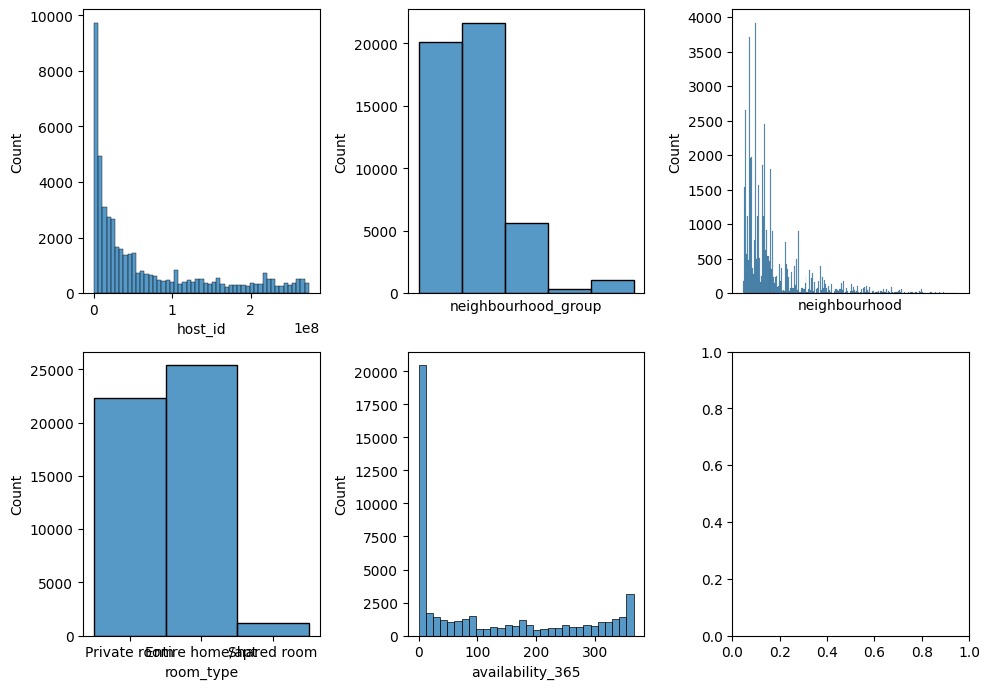

In [136]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.histplot(ax=axis[0,0], data = df, x = 'host_id')
sns.histplot(ax=axis[0,1], data = df, x = 'neighbourhood_group').set_xticks([])
sns.histplot(ax=axis[0,2], data = df, x = 'neighbourhood').set_xticks([])
sns.histplot(ax=axis[1,0], data = df, x = 'room_type')
sns.histplot(ax=axis[1,1], data = df, x = 'availability_365')

plt.tight_layout()

plt.show()

##### Numeric Variables

In [196]:
print('Total Accomodations over 1K USD per night:', df[df['price'] > 1000].shape[0])
print('\t0 day Availability: ', df[(df['price'] > 1000) & (df['availability_365'] < 1)].shape[0])
print('\tApparently not booked: ', df[(df['price'] > 1000) & (df['availability_365'] > 364)].shape[0])

print('\nTotal Accomodations over 2K USD per night:', df[df['price'] > 2000].shape[0])
print('\t0 day Availability: ', df[(df['price'] > 2000) & (df['availability_365'] < 1)].shape[0])
print('\tApparently not booked: ', df[(df['price'] > 2000) & (df['availability_365'] > 364)].shape[0])

print(
    '\nTotal Accomodations between 1K and 4K a night: ', df[(df['price'] > 1000) & (df['price'] < 4000)].shape[0], '\n',
    '\tNot Available: ', df[(df['price'] > 1000) & (df['price'] < 4000) & (df['availability_365'] < 1)].shape[0], '\n',
    '\tAvailable: ', df[(df['price'] > 1000) & (df['price'] < 4000) & (df['availability_365'] > 1)].shape[0]
)

print(f'\n{round((204 * 100)/239)}% of the accomodations over 1K are less than 4K which means only 25% of the total accomodations are over 4K')

Total Accomodations over 1K USD per night: 239
	0 day Availability:  67
	Apparently not booked:  38

Total Accomodations over 2K USD per night: 86
	0 day Availability:  16
	Apparently not booked:  12

Total Accomodations between 1K and 4K a night:  204 
 	Not Available:  58 
 	Available:  146

85% of the accomodations over 1K are less than 4K which means only 25% of the total accomodations are over 4K


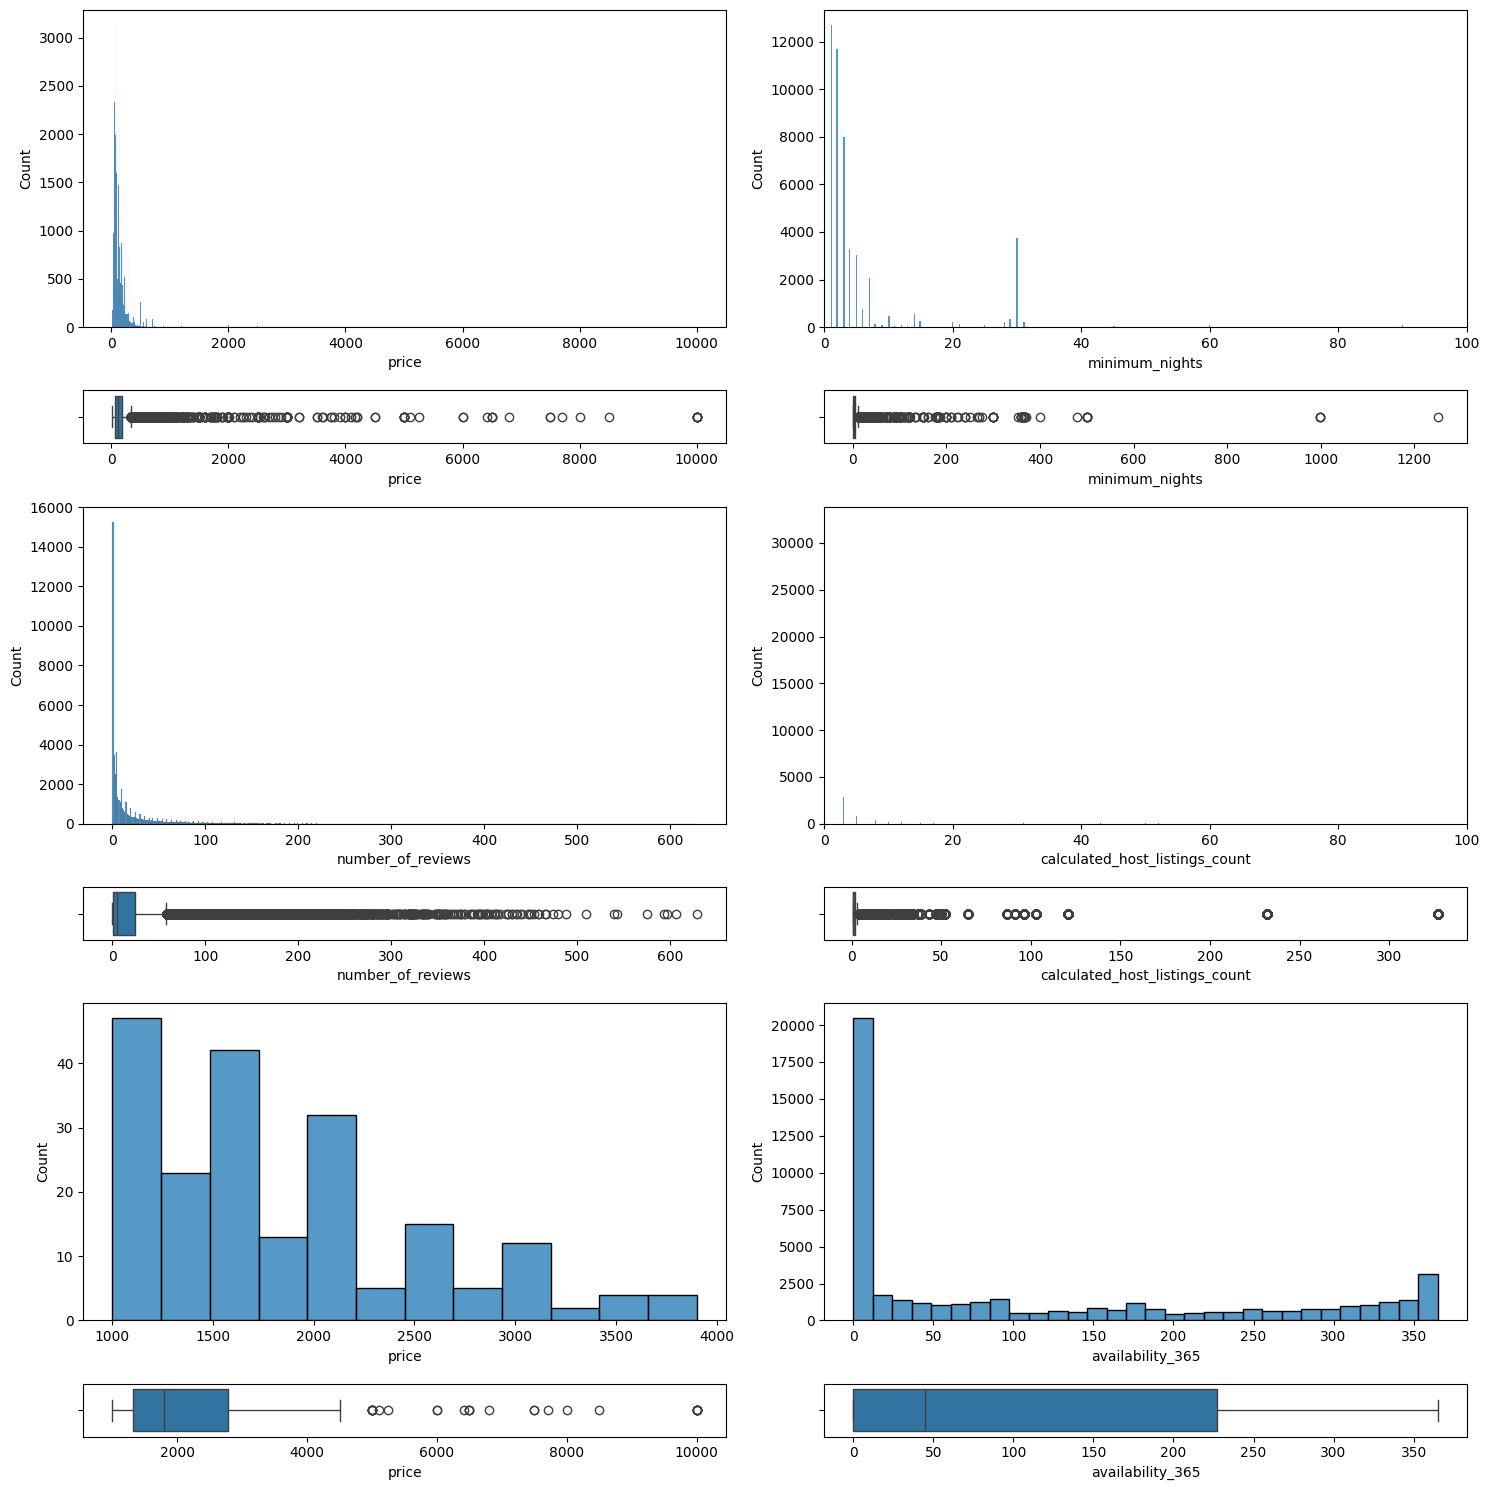

In [240]:
fig, axis = plt.subplots(
    nrows = 6,
    ncols = 2, 
    figsize = (
        15, 
        15
    ), 
    gridspec_kw = {
        "height_ratios": [6, 1, 6, 1, 6, 1]
    }
)

sns.histplot(ax = axis[0,0], data = df, x = 'price')
sns.boxplot(ax = axis[1,0], data = df, x = 'price')

sns.histplot(ax= axis[0,1], data = df, x = 'minimum_nights').set_xlim(0,100)
sns.boxplot(ax = axis[1,1], data = df, x = 'minimum_nights')

sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = df, x = "calculated_host_listings_count").set_xlim(0,100)
sns.boxplot(ax = axis[3, 1], data = df, x = "calculated_host_listings_count")

sns.histplot(ax = axis[4,0], data = df[(df['price'] > 1000) & (df['price'] < 4000)], x = "price")
sns.boxplot(ax = axis[5,0], data = df[df['price'] > 1000], x = 'price')

sns.histplot(ax=axis[4,1], data = df, x = 'availability_365')
sns.boxplot(ax=axis[5,1], data = df, x = 'availability_365')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Most Expensive Accomodations per night (Over 1K and 2K)

* We have 239 accomodations listed over 1K USD per night, 67 of them may be booked for the whole year or simply not available, 38 not booked
* We have 86 accomodations listed over 2K USD per night, 16 of them may be booked for the whole year or simply not available, 12 are not booked
* 85% of the accomodations over 1K are less than 4K which means only 25% of the total accomodations are over 4K

**With this information I cannot say accomodations with prices over 1K or even above 4K to be outliers to be remove as I dim possible to be information that could give us more insight into the price prediction process**


 Index(['room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'availability_365'],
      dtype='object')

Minimum Nights:
	Minimum: 1 
	Maximum: 365

Number of Reviews:
	Minimum: 0 
	Maximum: 480


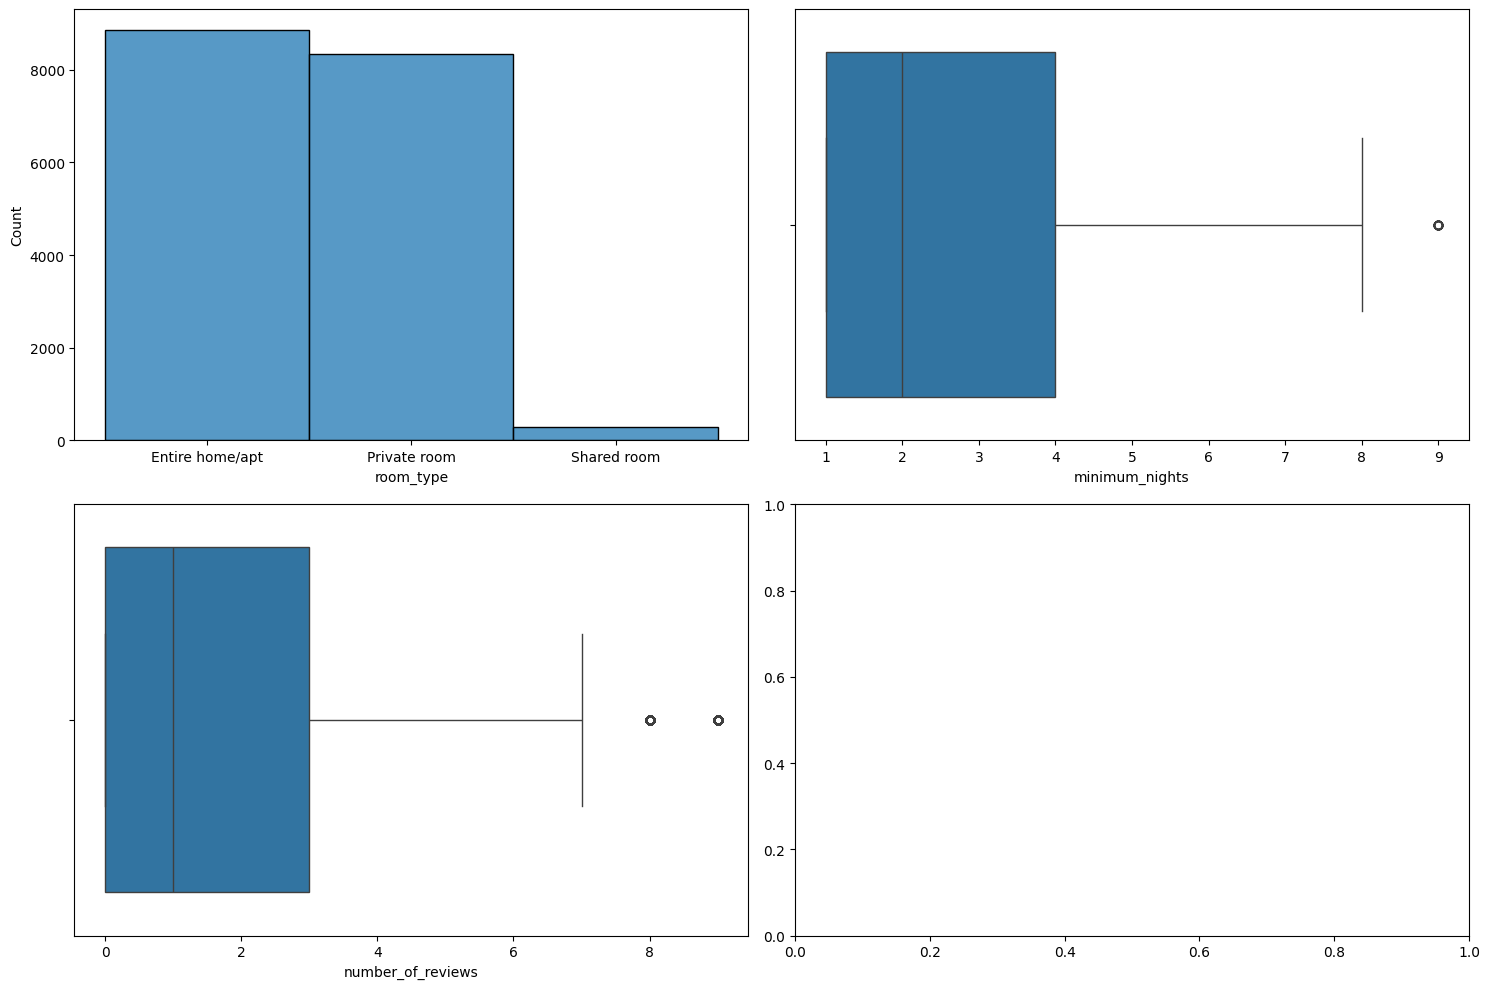

In [198]:
import warnings
warnings.filterwarnings("ignore")
room_0_av = df[df['availability_365'] == 0]

room_0_av.drop(columns=['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude','calculated_host_listings_count'], axis=1, inplace=True)
print('\n',room_0_av.columns)
print('\nMinimum Nights:\n\tMinimum:', room_0_av['minimum_nights'].min(), '\n\tMaximum:', room_0_av['minimum_nights'].max())
print('\nNumber of Reviews:\n\tMinimum:', room_0_av['number_of_reviews'].min(), '\n\tMaximum:', room_0_av['number_of_reviews'].max())


fig, axis = plt.subplots(nrows=2, ncols=2, figsize = (15, 10))

sns.histplot(ax = axis[0,0], data = room_0_av.sort_values(by = 'room_type'), x = 'room_type')
sns.boxplot(ax = axis[0,1], data = room_0_av[room_0_av['minimum_nights']<10], x="minimum_nights")
sns.boxplot(ax = axis[1,0], data = room_0_av[room_0_av['number_of_reviews']<10], x="number_of_reviews")

plt.tight_layout()
plt.show()

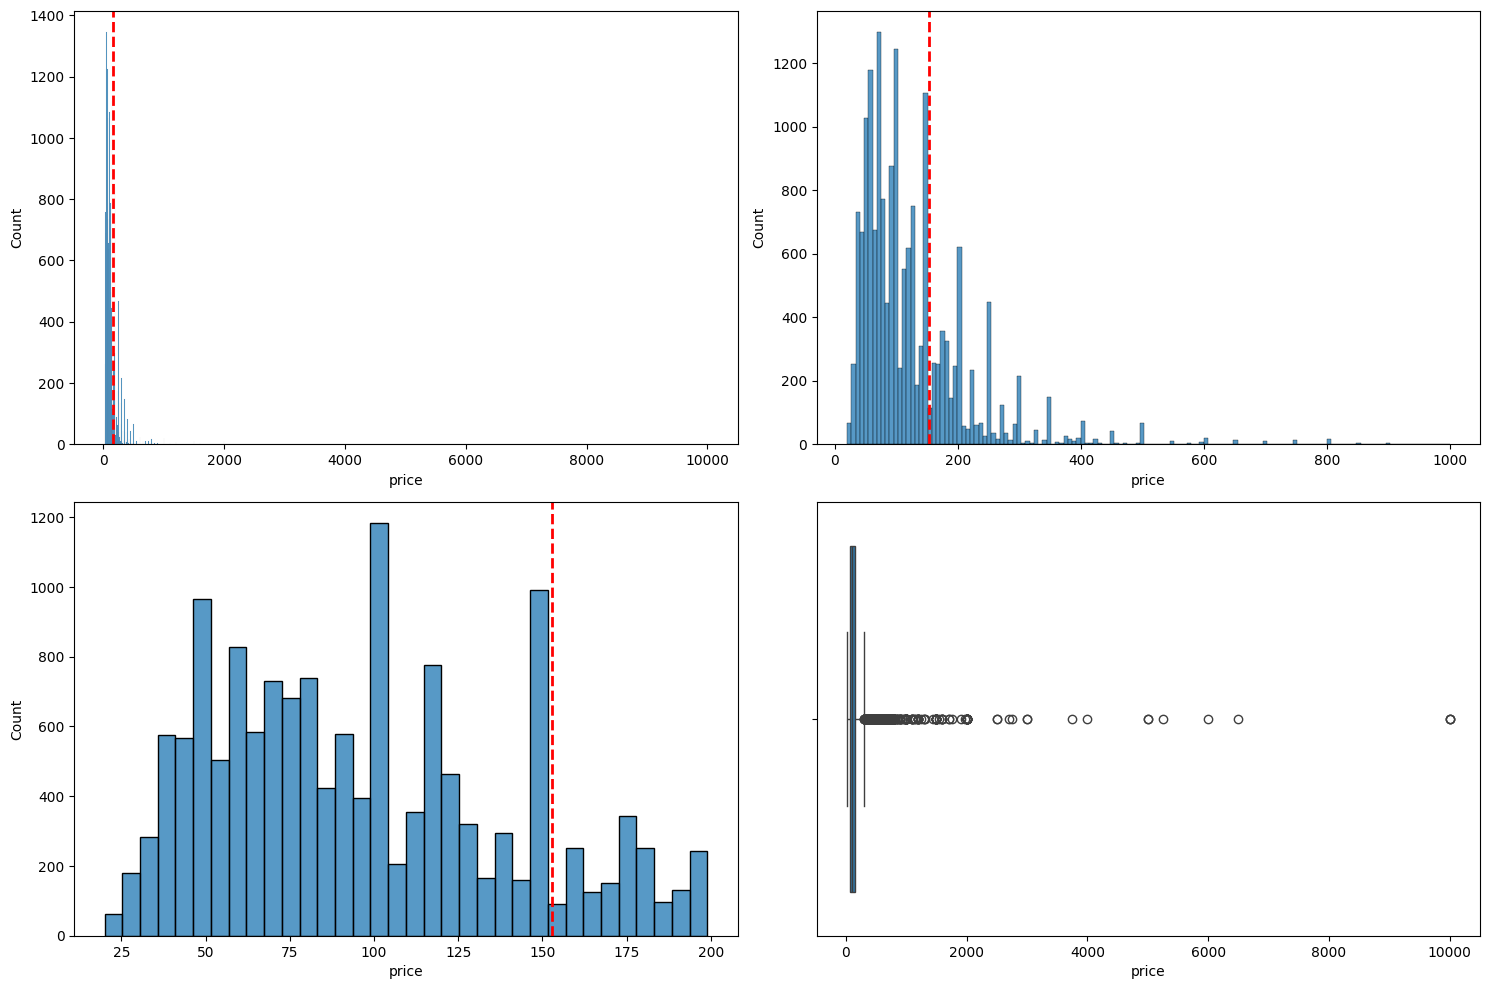

In [152]:
fig, axis = plt.subplots(2, 2, figsize=(15, 10))

mean_price = df['price'].mean()

sns.histplot(ax = axis[0,0], data = room_0_av, x="price")
sns.histplot(ax = axis[0,1], data = room_0_av[room_0_av['price']<1000], x="price")
sns.histplot(ax = axis[1,0], data = room_0_av[room_0_av['price']<200], x="price")
sns.boxplot(ax = axis[1,1], data = room_0_av, x="price")

axis[0, 0].axvline(x=mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean Price: ${mean_price:.2f}')
axis[0, 1].axvline(x=mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean Price: ${mean_price:.2f}')
axis[1, 0].axvline(x=mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean Price: ${mean_price:.2f}')


plt.tight_layout()
plt.show()

#### When **availability_365** is equal to 0:
* Entire home/apt is the room_type with more rows at 0, followed by Private Room and finally with a big difference Shared Room, so I assume that according to the purpose of Airbnb those accomodations are booked for long-term living purposes
* Entire home/apt could be used for more than one person, maybe entire families
* Private Room and Shared Room may be used for people either travelling for a short period of time and the accomodations being on high demand as NY is a great place for tourism or may be used for medium-long term stays for either students, low income clients or users looking to save money

* The highest demand regarding prices is between the 50 USD and 150 USD
* The accomodations that are a little cheaper than the mean value(~160 USD) of the whole dataset are the 3rd most accomodations with 0 availability, so the most booked according to my first assumtion of the real interpretation of the availability column data
* The most booked accomodations are ~50 USD less than mean value price of the whole dataset

### Multivariate Variables
##### num - num

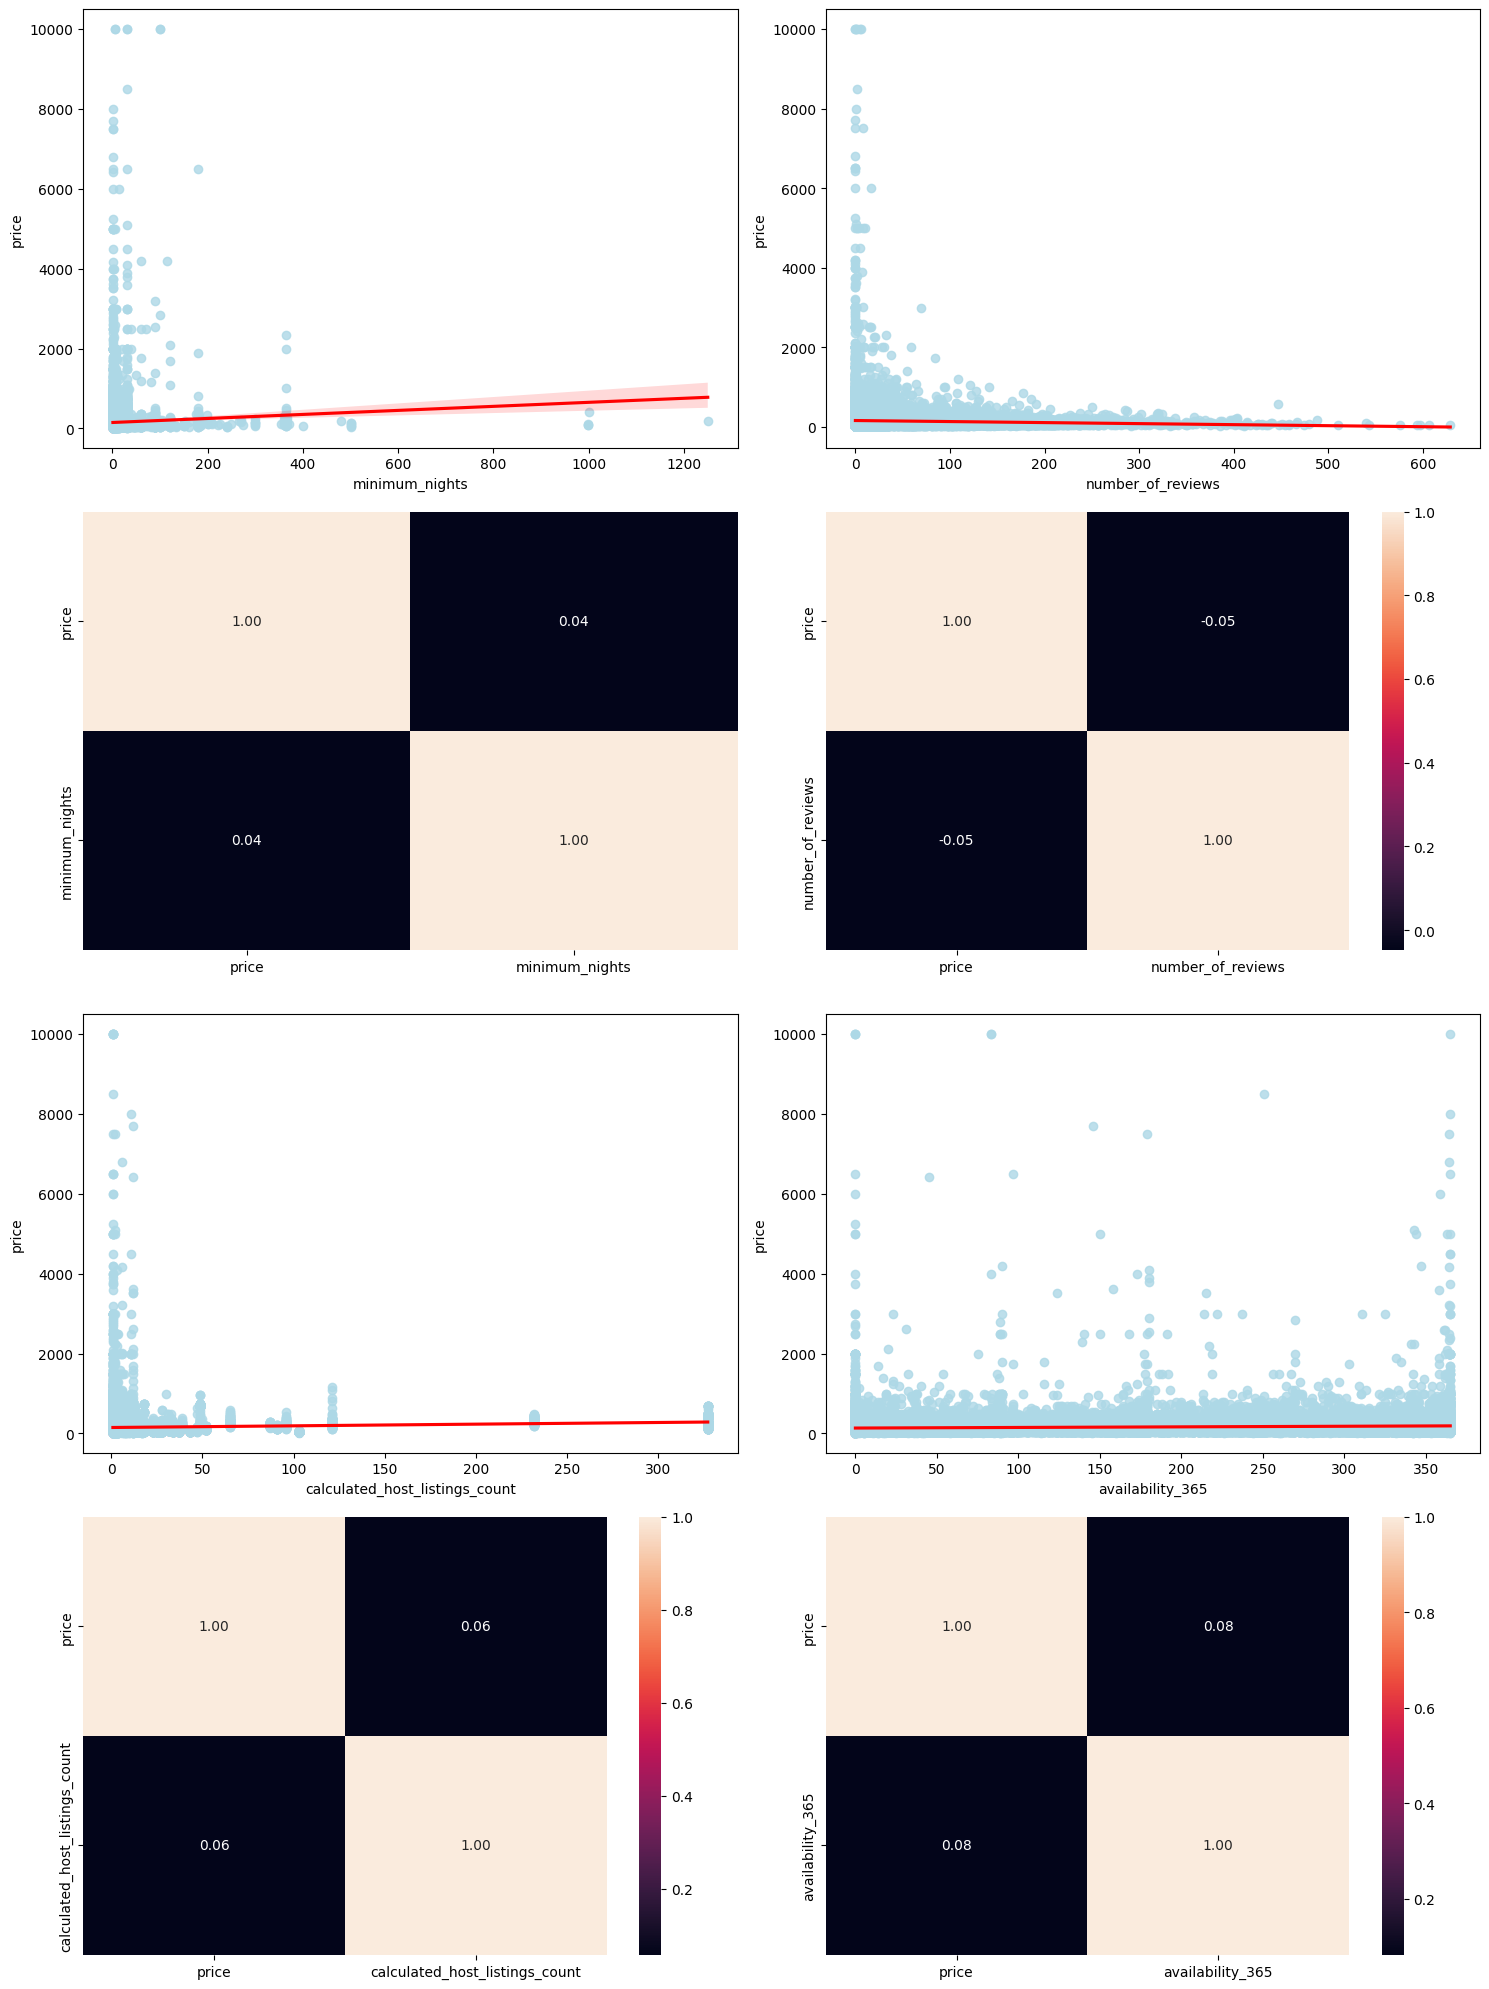

In [204]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15,20))
x_color = 'lightblue'
y_color = 'red'

sns.regplot(ax=axis[0,0], data = df, x = "minimum_nights", y = "price", scatter_kws={'color': x_color}, line_kws={'color': y_color})
sns.heatmap(df[["price", 'minimum_nights']].corr(), annot = True, fmt = ".2f", ax=axis[1,0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price", scatter_kws={'color': x_color}, line_kws={'color': y_color})
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2,0], data = df, x = "calculated_host_listings_count", y = "price", scatter_kws={'color': x_color}, line_kws={'color': y_color})
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2,1], data = df, x = "availability_365", y = "price", scatter_kws={'color': x_color}, line_kws={'color': y_color})
sns.heatmap(df[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

* There's no clear relation between non of the variables

Cat-cat

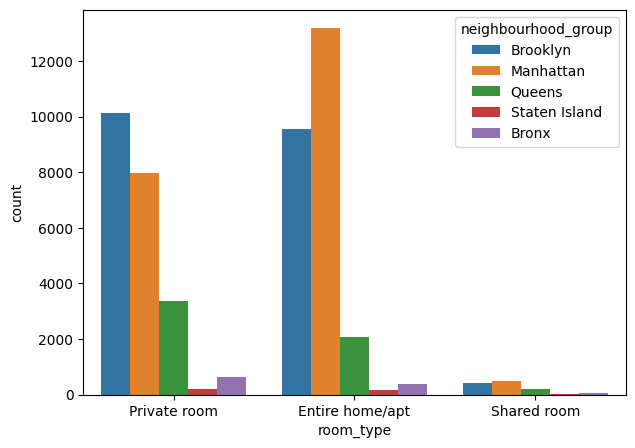

In [241]:
fig, axis = plt.subplots(figsize = (7, 5))

sns.countplot(data = df, x = "room_type", hue = "neighbourhood_group")

plt.show()

Manhattan -> 59.1 km² | Brooklyn -> 180 km² | Queens -> 280 km² | Staten Island -> 152 km² | Bronx -> 110 km²

* By Room Type we have:
    * Entire home/apt (Most Offers)
        * **Most:** Manhattan
        * **Less:** Staten Island

    * Private Room
        * **Most:** Brooklyn
        * **Less:** Staten Island 

    * Shared Room (Less Offers)
        * **Most:** Manhattan
        * **Less:** Staten Island


* Staten Island has significantly less accomodations than the other neighbourhood groups, we can assume that is related to the fact that is pretty much outside of the city and the transportation to the tourist places may be an issue since there are only 2 entrances to Staten Island from the may zones. Staten Island tends to be more of a residential zone.
* Bronx is a close second to Staten Island, maybe because of the high crime rate
* Queens in 3rd place is one of the safest zones to live in NYC according to the crime rates, on the other hand is far from Downtown and tourist places, the transportation costs might be a factor to be low demand and therefore low offer
* As for Manhattan and Brooklyn, as those are two of the most known Neighbourhood Groups in NYC we can assume that plays a primary role regarding the offer and demand, as well as the fact that Manhattan is the most tourist area in NYC and Brooklyn is just next to it.


* At first glance there's no relation between neighbourhood_group and room_type, to determine if there is an actual relation we would have to take a deep dive into the city infrastructure and the social aspects related to those zones.
    * At least from pop culture I can assume that Manhattan being an overcrowded city with lots of tower buildings and homes/apartments tend to be small and pricey, I can assume that Entire home/apt tends to be more present as the majority of them don't really have space to have more than 1 or 2 rooms, therefore they may have to be listed in that room type as is the whole place for the person or people who rent them

In [242]:
df['room_type'] = pd.factorize(df['room_type'])[0]
df['neighbourhood'] = pd.factorize(df['neighbourhood'])[0]
df['neighbourhood_group'] = pd.factorize(df['neighbourhood_group'])[0]

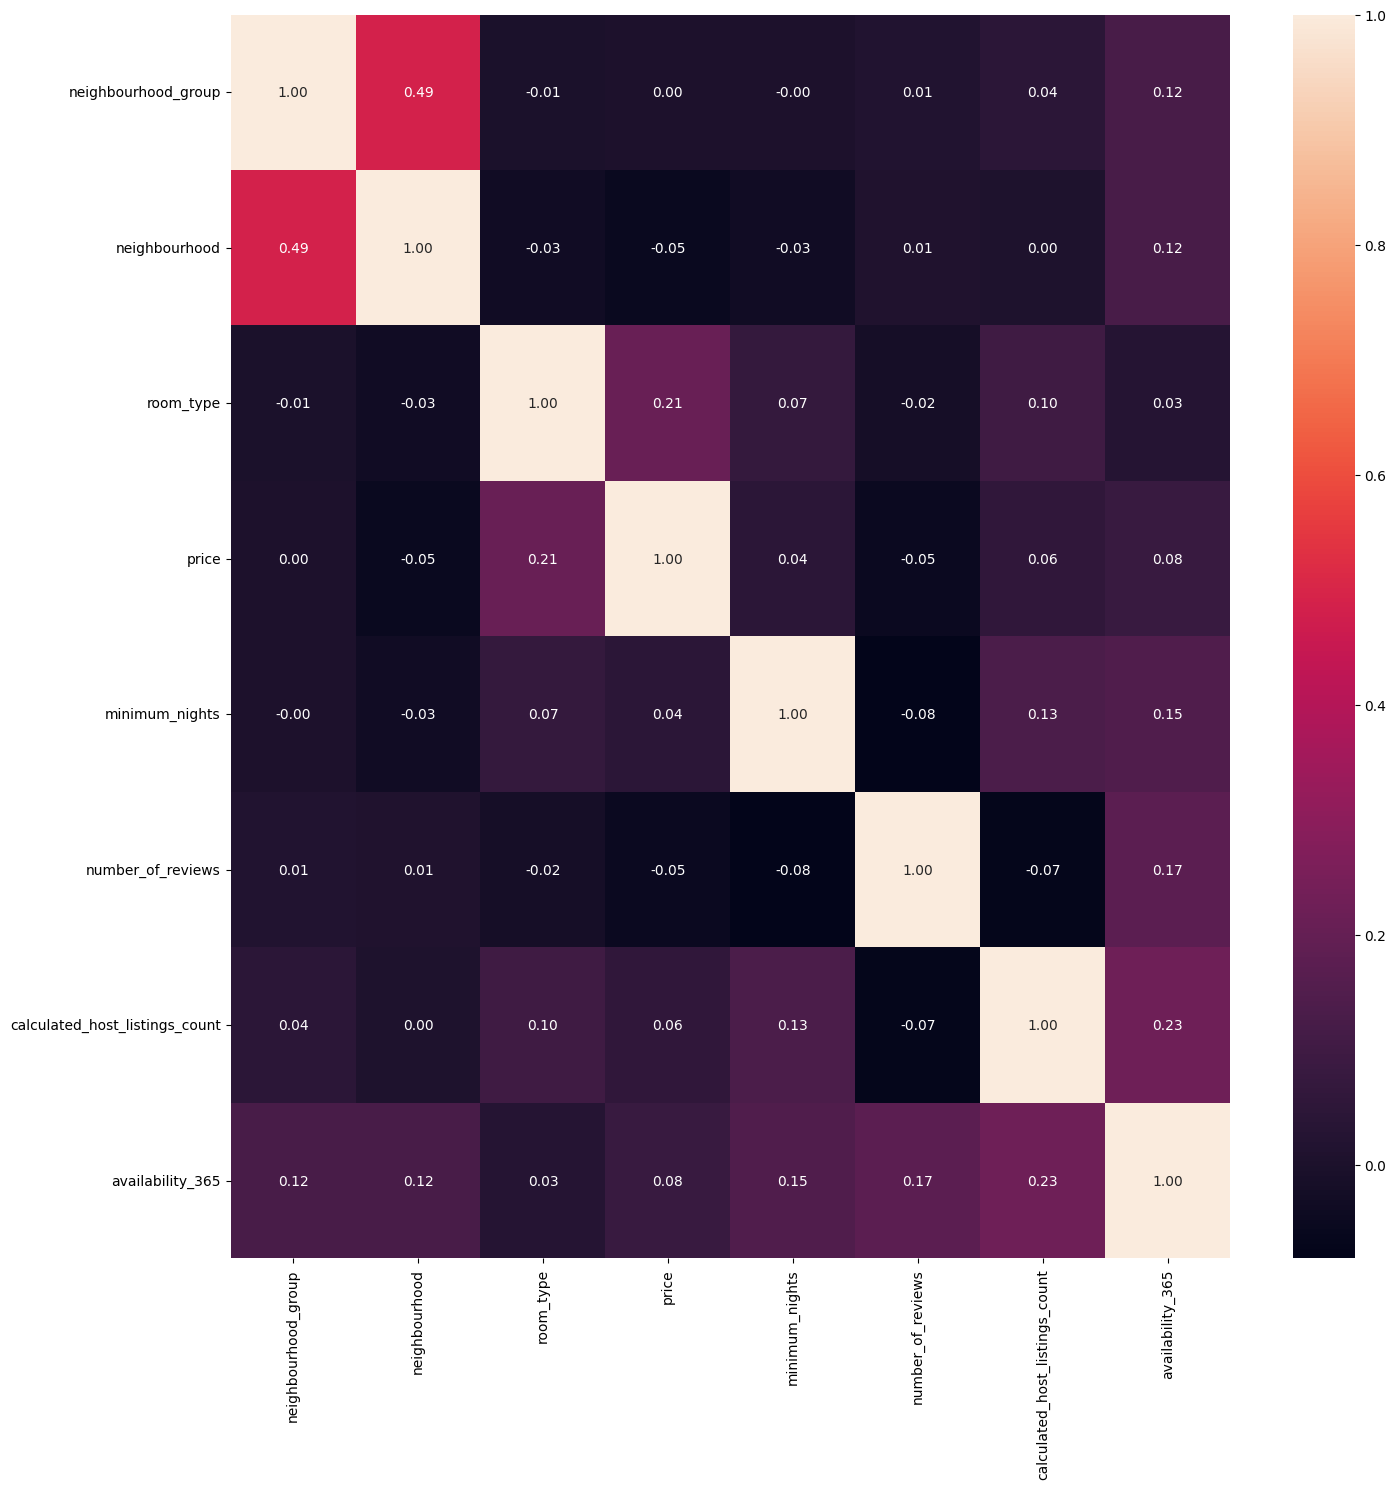

In [243]:
fig, axis = plt.subplots(figsize=(15,15))

sns.heatmap(
    df[
        [
            "neighbourhood_group",
            "neighbourhood",
            "room_type",
            "price",
            "minimum_nights",
            "number_of_reviews",
            "calculated_host_listings_count",
            "availability_365"
        ]
    ].corr(),
            annot = True, 
            fmt = ".2f"
)

plt.tight_layout()

# Draw Plot
plt.show()


#### All Data

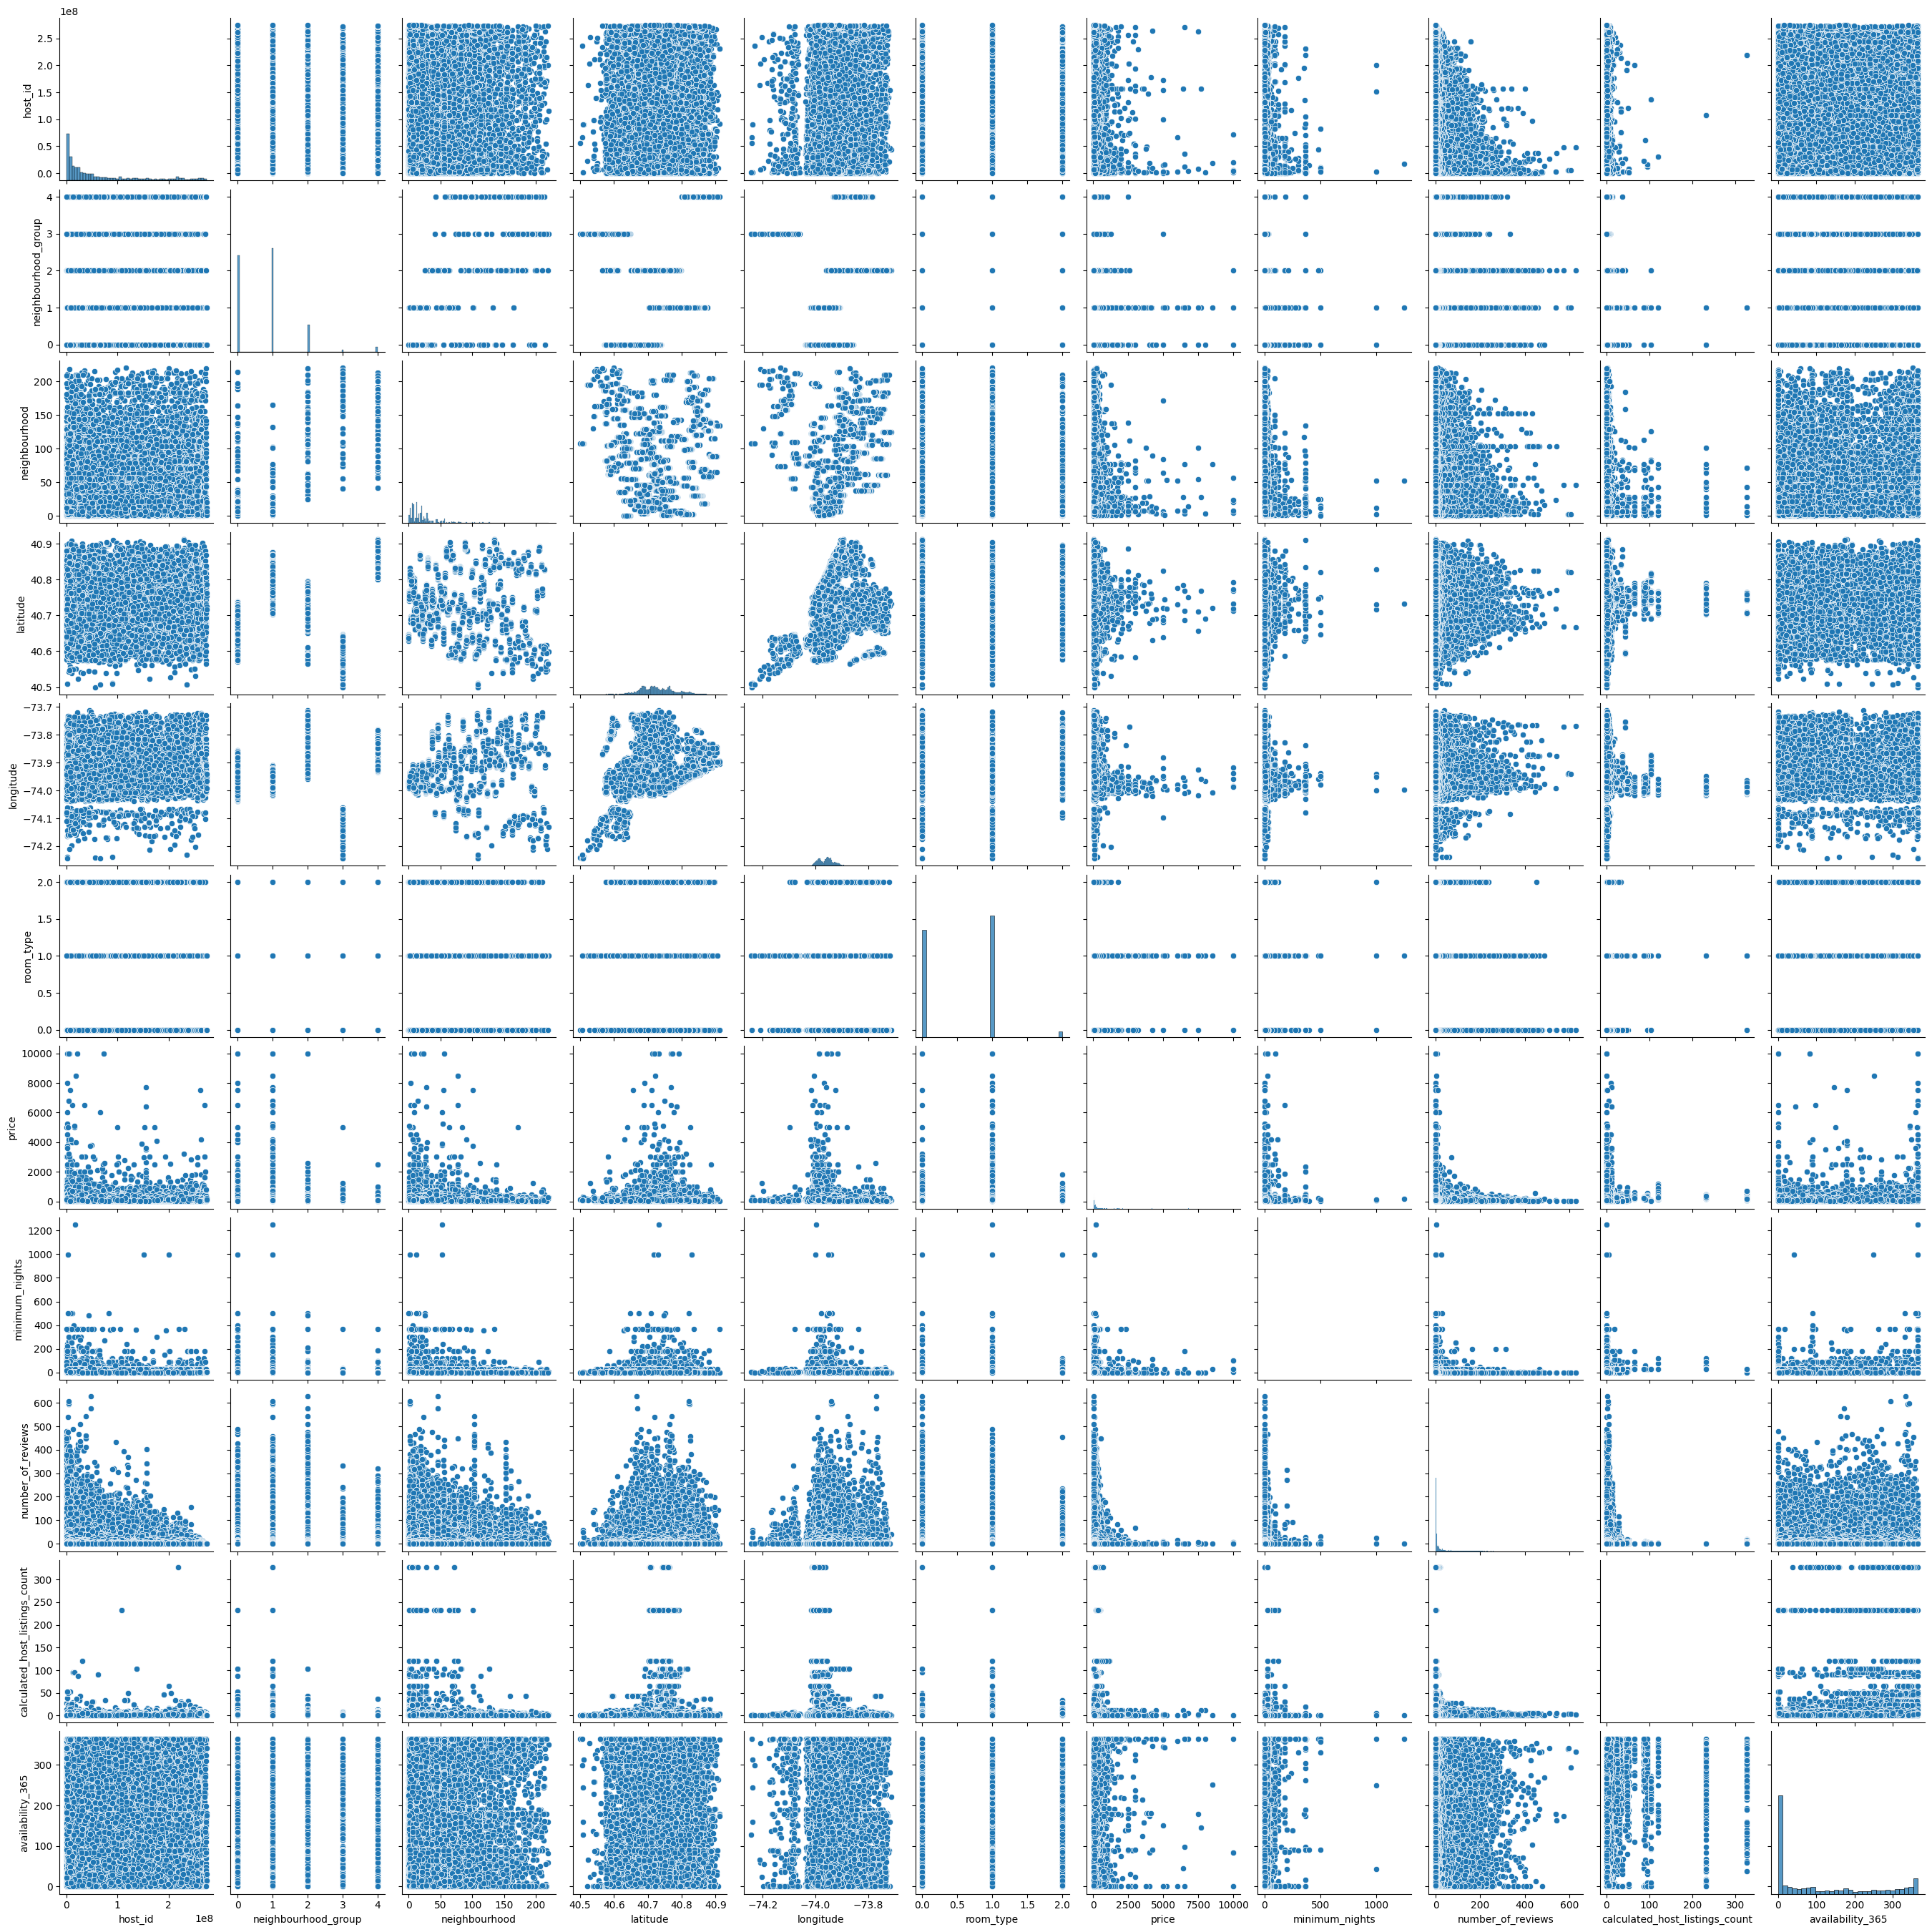

In [244]:
sns.pairplot(data = df)

#### Feature Engineering

In [34]:
stats = df.describe()
stats

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


d:\Documents\courses\4geeks-ml-template-prjs\.env-eda\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
d:\Documents\courses\4geeks-ml-template-prjs\.env-eda\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
d:\Documents\courses\4geeks-ml-template-prjs\.env-eda\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
d:\Documents\courses\4geeks-ml-template-prjs\.env-eda\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of panda

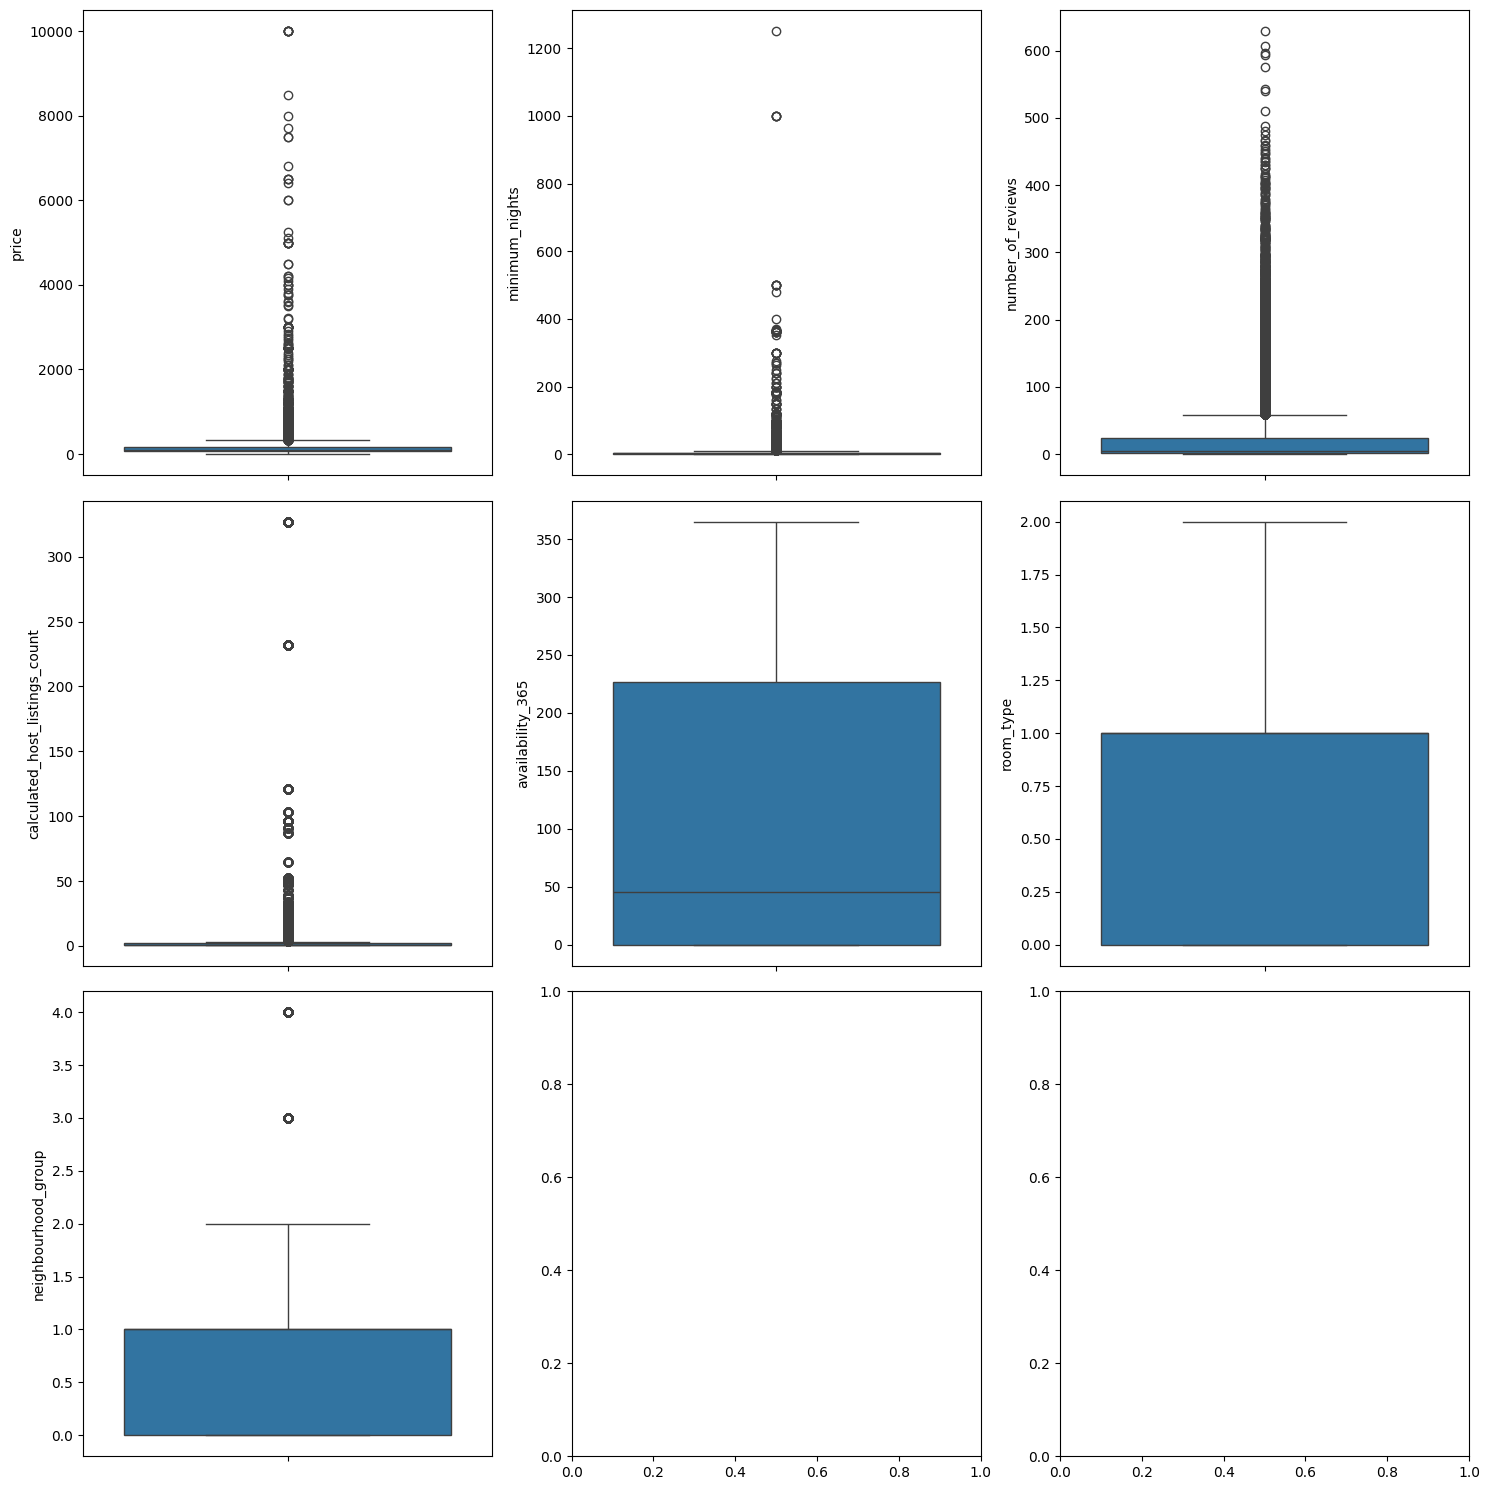

In [35]:
fig, axis = plt.subplots(3, 3, figsize=(15,15))

sns.boxplot(ax = axis[0, 0], data = df, y = "price")
sns.boxplot(ax = axis[0, 1], data = df, y = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = df, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 0], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 1], data = df, y = "availability_365")
sns.boxplot(ax = axis[1, 2], data = df, y = "room_type")
sns.boxplot(ax = axis[2, 0], data = df, y = "neighbourhood_group")

plt.tight_layout()

plt.show()

In [36]:
price_iqr = stats['price']['75%'] - stats['price']['25%']
lower_l_price = stats['price']["75%"] + 1.5 * price_iqr
upper_l_price = stats['price']["25%"] - 1.5 * price_iqr

print(f'Price: \n\tInterquartile Range: {price_iqr} \n\tLower Limit: {lower_l_price} \n\tUpper Limit: {upper_l_price}')

Price: 
	Interquartile Range: 106.0 
	Lower Limit: 334.0 
	Upper Limit: -90.0


In [37]:
av_iqr = stats['availability_365']['75%'] - stats['availability_365']['25%']
lower_l_av = stats['availability_365']["75%"] + 1.5 * av_iqr
upper_l_av = stats['availability_365']["25%"] - 1.5 * av_iqr

print(f'Availability_365: \n\tInterquartile Range: {av_iqr} \n\tLower Limit: {lower_l_av} \n\tUpper Limit: {upper_l_av}')

Availability_365: 
	Interquartile Range: 227.0 
	Lower Limit: 567.5 
	Upper Limit: -340.5
